In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [169]:
p2_2020 = pd.read_csv('../2020P2_calibration_data_60m.csv')
p2_2021 = pd.read_csv('../2021P2_calibration_data_60m.csv')
xgb_train_df = pd.read_csv('datadriven_res/xgb_train_ts_res.csv')/3.6
xgb_test_df = pd.read_csv('datadriven_res/xgb_test_ts_res.csv')/3.6


In [170]:
train_keep_i = []
p2_2020_fcws = p2_2020['NB2_S_x_NYZ_x_x_Fcw_x'].values.tolist()
for i in range(len(xgb_train_df)):
    this_fcw = xgb_train_df.iloc[i]['Fcw_yobse']
    for j in range(len(p2_2020_fcws)):
        if abs(this_fcw - p2_2020_fcws[j]) < 0.01:
            train_keep_i.append(i)
            p2_2020_fcws.pop(j)
            break
            
test_keep_i = []
p2_2021_fcws = p2_2021['NB2_S_x_NYZ_x_x_Fcw_x'].values.tolist()
for i in range(len(xgb_test_df)):
    this_fcw = xgb_test_df.iloc[i]['Fcw_yobse']
    for j in range(len(p2_2021_fcws)):
        if abs(this_fcw - p2_2021_fcws[j]) < 0.01:
            test_keep_i.append(i)
            p2_2021_fcws.pop(j)
            break
                    

In [171]:
def get_mape(y_true: np.ndarray, y_pred: np.ndarray):
    res = 100*(abs((y_true - y_pred)/y_true)).mean()
    return res

def get_mae(y_true: np.ndarray, y_pred: np.ndarray):
    res = (abs(y_true - y_pred)).mean()
    return res

def get_cvrmse(y_true: np.ndarray, y_pred: np.ndarray):
    n = len(y_true)
    p = 1
    res = 100*(((y_true - y_pred)**2).sum()/(n-p))**0.5/y_true.mean()
    return res

def get_nmbe(y_true: np.ndarray, y_pred: np.ndarray):
    n = len(y_true)
    p = 1
    be = (y_true - y_pred).sum()
    res = 100*be/((n-p)*y_true.mean())
    return res

In [172]:
def draw_line_plot(train_res_df, test_res_df, method_name = 'MLP',
                   err_metrics = ['MAPE', 'MAE', 'CVRMSE', 'NMBE']):
    fig, axs=plt.subplots(2, 1, figsize = (20, 10))
    axs[0].plot(train_res_df['Fcw_yobse'].values, color = 'blue', 
                linewidth = 4, label = 'y_observed')
    axs[0].plot(train_res_df['Fcw_ypred'].values, color = 'red', 
                linestyle = '--', label = f'{method_name}_y_predicted')
    axs[0].legend(loc='upper right', fontsize = 13)
    axs[0].set_title('Training Performance using 2020 Data', fontsize = 15)
    axs[0].set_ylabel('Chilled Water Mass Flow Rate (kg/s)', fontsize = 15)
    train_y_max = 100*(1+max(train_res_df['Fcw_yobse'])//100)
    axs[0].set_ylim([0, train_y_max])
    err_text = ''
    for err_metric in err_metrics:
        if err_metric == 'MAPE':
            err = round(get_mape(y_true = train_res_df['Fcw_yobse'].values,
                           y_pred = train_res_df['Fcw_ypred'].values), 2)
            err_text += f'MAPE: {err}%\n'
        elif err_metric == 'MAE':
            err = round(get_mae(y_true = train_res_df['Fcw_yobse'].values,
                           y_pred = train_res_df['Fcw_ypred'].values), 2)
            err_text += f'MAE: {err}\n'
        elif err_metric == 'CVRMSE':
            err = round(get_cvrmse(y_true = train_res_df['Fcw_yobse'].values,
                           y_pred = train_res_df['Fcw_ypred'].values), 2)
            err_text += f'CVRMSE: {err}%\n'
        elif err_metric == 'NMBE':
            err = round(get_nmbe(y_true = train_res_df['Fcw_yobse'].values,
                           y_pred = train_res_df['Fcw_ypred'].values), 2)
            err_text += f'NMBE: {err}%\n'
    print(err_text)
    axs[0].text(-50, train_y_max*0.98, err_text,
             horizontalalignment='left',
             verticalalignment='top',
             fontsize = 12,
             color = 'b')
        
    
    axs[1].plot(test_res_df['Fcw_yobse'].values, color = 'green', 
                linewidth = 4, label = 'y_observed')
    axs[1].plot(test_res_df['Fcw_ypred'].values, color = 'purple', 
                linestyle = '--', label = f'{method_name}_y_predicted')
    axs[1].legend(loc='upper right', fontsize = 13)
    axs[1].set_title('Testing Performance using 2021 Data', fontsize = 15)
    axs[1].set_ylabel('Chilled Water Mass Flow Rate (kg/s)', fontsize = 15)
    axs[1].set_xlabel('Timestamps (Hourly)', fontsize = 15)
    test_y_max = 100*(1+max(test_res_df['Fcw_yobse'])//100)
    axs[1].set_ylim([0, test_y_max])
    err_text = ''
    for err_metric in err_metrics:
        if err_metric == 'MAPE':
            err = round(get_mape(y_true = test_res_df['Fcw_yobse'].values,
                           y_pred = test_res_df['Fcw_ypred'].values), 2)
            err_text += f'MAPE: {err}%\n'
        elif err_metric == 'MAE':
            err = round(get_mae(y_true = test_res_df['Fcw_yobse'].values,
                           y_pred = test_res_df['Fcw_ypred'].values), 2)
            err_text += f'MAE: {err}\n'
        elif err_metric == 'CVRMSE':
            err = round(get_cvrmse(y_true = test_res_df['Fcw_yobse'].values,
                           y_pred = test_res_df['Fcw_ypred'].values), 2)
            err_text += f'CVRMSE: {err}%\n'
        elif err_metric == 'NMBE':
            err = round(get_nmbe(y_true = test_res_df['Fcw_yobse'].values,
                           y_pred = test_res_df['Fcw_ypred'].values), 2)
            err_text += f'NMBE: {err}%\n'
    print(err_text)
    axs[1].text(-30, test_y_max*0.98, err_text,
             horizontalalignment='left',
             verticalalignment='top',
             fontsize = 12,
             color = 'g')
    plt.subplots_adjust(hspace=0.15)


MAPE: 1.63%
MAE: 7.15
CVRMSE: 1.77%
NMBE: -0.12%

MAPE: 9.89%
MAE: 25.28
CVRMSE: 9.78%
NMBE: -3.65%



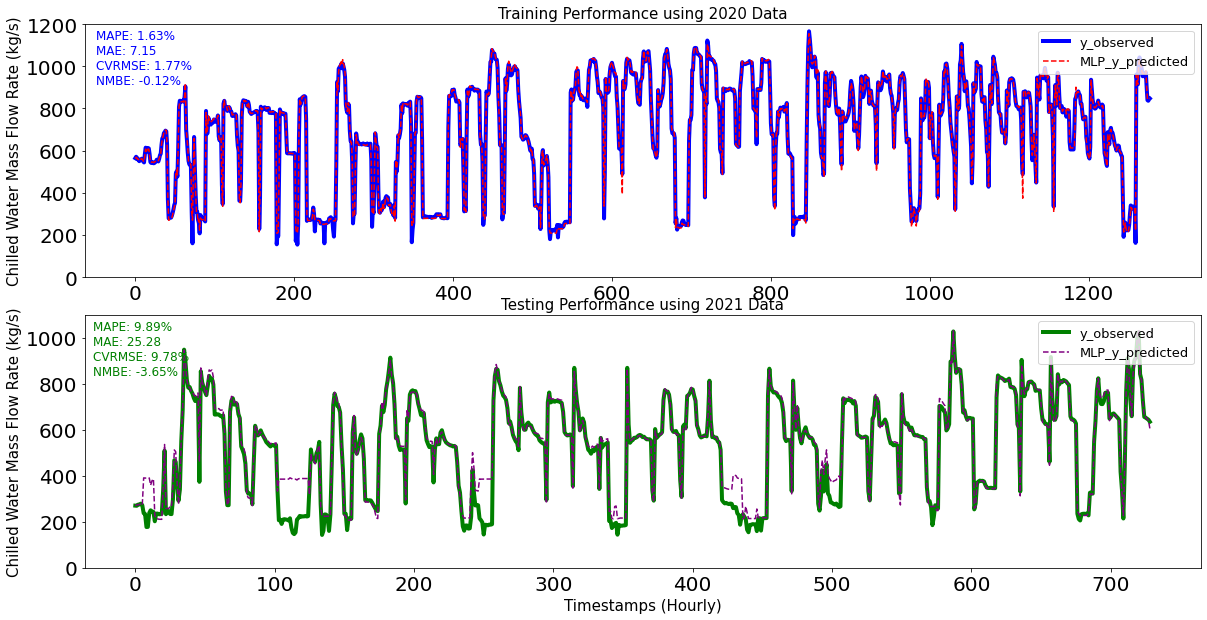

In [173]:
mlp_train_df = (pd.read_csv('datadriven_res/mlp_train_ts_res.csv')/3.6).iloc[train_keep_i]
mlp_test_df = (pd.read_csv('datadriven_res/mlp_test_ts_res.csv')/3.6).iloc[test_keep_i]
draw_line_plot(mlp_train_df, mlp_test_df, method_name = 'MLP')


MAPE: 3.0%
MAE: 15.2
CVRMSE: 3.73%
NMBE: -0.04%

MAPE: 15.48%
MAE: 41.65
CVRMSE: 14.31%
NMBE: -6.74%



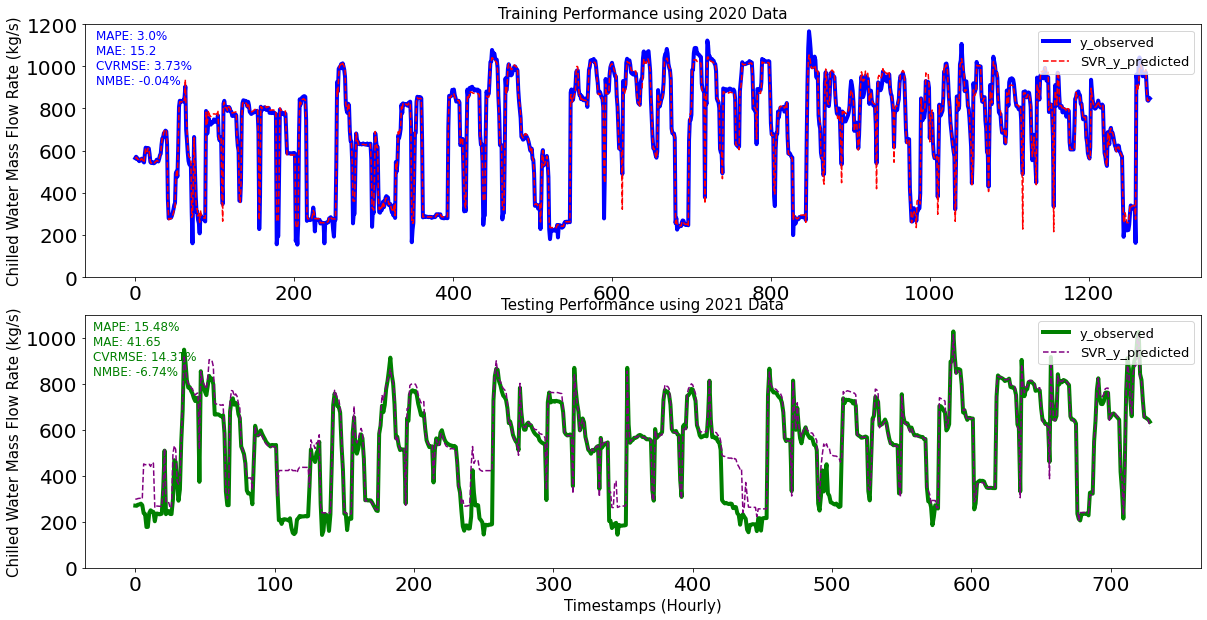

In [174]:
svr_train_df = (pd.read_csv('datadriven_res/svr_train_ts_res.csv')/3.6).iloc[train_keep_i]
svr_test_df = (pd.read_csv('datadriven_res/svr_test_ts_res.csv')/3.6).iloc[test_keep_i]
draw_line_plot(svr_train_df, svr_test_df, method_name = 'SVR')

MAPE: 1.64%
MAE: 7.29
CVRMSE: 1.77%
NMBE: 0.0%

MAPE: 18.28%
MAE: 44.62
CVRMSE: 21.77%
NMBE: -5.96%



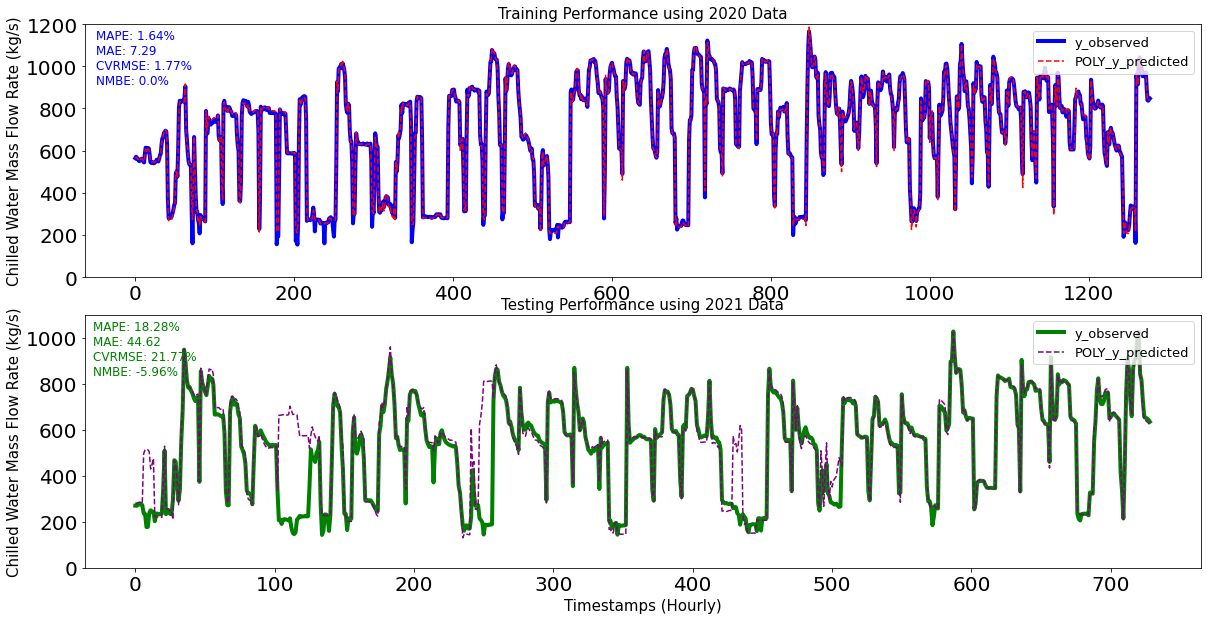

In [175]:
poly_train_df = (pd.read_csv('datadriven_res/poly_train_ts_res.csv')/3.6).iloc[train_keep_i]
poly_test_df = (pd.read_csv('datadriven_res/poly_test_ts_res.csv')/3.6).iloc[test_keep_i]
draw_line_plot(poly_train_df, poly_test_df, method_name = 'POLY')

MAPE: 2.03%
MAE: 9.28
CVRMSE: 2.14%
NMBE: -0.06%

MAPE: 13.86%
MAE: 44.91
CVRMSE: 12.16%
NMBE: -1.02%



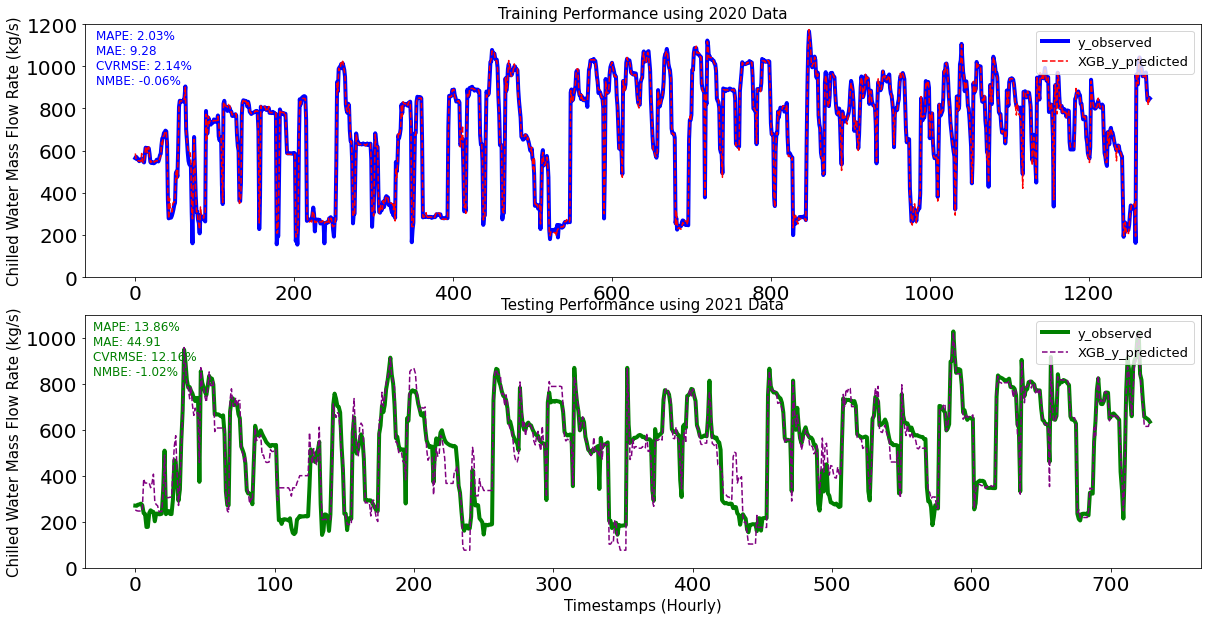

In [176]:
xgb_train_df = (pd.read_csv('datadriven_res/xgb_train_ts_res.csv')/3.6).iloc[train_keep_i]
xgb_test_df = (pd.read_csv('datadriven_res/xgb_test_ts_res.csv')/3.6).iloc[test_keep_i]
draw_line_plot(xgb_train_df, xgb_test_df, method_name = 'XGB')

MAPE: 4.51%
MAE: 23.91
CVRMSE: 6.67%
NMBE: 2.4%

MAPE: 5.07%
MAE: 22.53
CVRMSE: 6.47%
NMBE: 3.2%



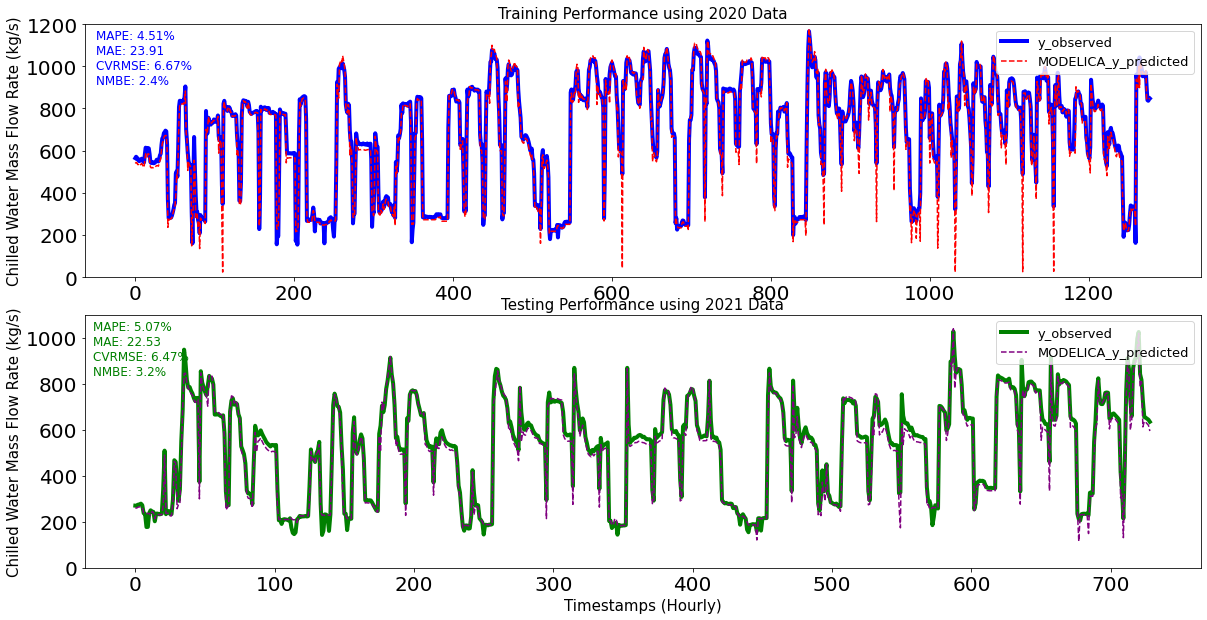

In [177]:
mo_train_df_pred = pd.read_csv('../cali_exp_4/run_1699339352.8566556/calibrated_model/sim_res_cali.csv')
mo_train_df_obse = pd.read_csv('../2020P2_calibration_data_60m.csv')
mo_train_df = pd.DataFrame()
mo_train_df['Fcw_ypred'] = mo_train_df_pred['Fcw_ypred'].values
mo_train_df['Fcw_yobse'] = mo_train_df_obse['NB2_S_x_NYZ_x_x_Fcw_x'].values
mo_train_df = mo_train_df.loc[mo_train_df['Fcw_yobse']>0]

mo_test_df_pred = pd.read_csv('../cali_exp_4/run_1699339352.8566556/calibrated_model/sim_res_test.csv')
mo_test_df_obse = pd.read_csv('../2021P2_calibration_data_60m.csv')
mo_test_df = pd.DataFrame()
mo_test_df['Fcw_ypred'] = mo_test_df_pred['Fcw_ypred'].values
mo_test_df['Fcw_yobse'] = mo_test_df_obse['NB2_S_x_NYZ_x_x_Fcw_x'].values
mo_test_df = mo_test_df.loc[mo_test_df['Fcw_yobse']>0]

draw_line_plot(mo_train_df, mo_test_df, method_name = 'MODELICA')

In [178]:
import os

import statsmodels.api as sm

from DistrDist import Kuncheva2014, KLdivergence
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KernelDensity
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def calculate_prob_cmp(org_data: pd.DataFrame,
                      new_data: pd.DataFrame,
                      sel_cols: list,
                      bw: int,
                      org_data_label: str = None,
                      new_data_label: str = None,
                      save_dir: str = '.',
                      do_draw: bool = True):
    org_data_sel = org_data[sel_cols]
    std_scaler = StandardScaler()
    org_data_sel_std = std_scaler.fit_transform(org_data_sel)
    org_kde = sm.nonparametric.KDEMultivariate(data=org_data_sel_std, 
                                               var_type='c'*org_data_sel_std.shape[1], 
                                               bw=[bw]*org_data_sel_std.shape[1])
    new_data_sel = new_data[sel_cols]
    new_data_sel_std = std_scaler.transform(new_data_sel)
    
    org_prob = org_kde.pdf(org_data_sel_std)
    new_prob = org_kde.pdf(new_data_sel_std)
    org_data_label = 'original_data' if org_data_label is None else org_data_label
    new_data_label = 'new_data' if new_data_label is None else new_data_label
    org_data_col_name = f'Probability on {org_data_label}'
    new_data_col_name = f'Probability on {new_data_label}'
    cmp_df = pd.concat([pd.DataFrame({org_data_col_name: org_prob}), 
                           pd.DataFrame({new_data_col_name: new_prob})],
                          axis = 1)
    if not os.path.isdir(save_dir):
        os.mkdir(save_dir)
    cmp_df.to_csv(f'{save_dir}/{org_data_label}_{new_data_label}_prob_cmp.csv')
    
    if do_draw:
        plt.rcParams.update({'font.size': 20})
        fig, axs = plt.subplots(1, figsize = (15,10))
        axs.plot(org_prob, color = 'red', linewidth = 2, alpha = 1, label = org_data_label)
        axs.plot(new_prob, color = 'k', linewidth = 2, alpha = 1, label = new_data_label, linestyle = '-')
        axs.legend(loc='upper right')
        axs.set_xlabel('Data Samples')
        axs.set_ylabel('Probability Estimated by KDE')
        fig.savefig(f'{save_dir}/{org_data_label}_{new_data_label}_prob_cmp.png')
    return org_prob, new_prob, org_kde

def draw_prob_vs_err(y_true_valid: np.ndarray,
                     y_pred_valid: np.ndarray,
                     x_prob_valid: np.ndarray,
                     y_true_train: np.ndarray,
                     y_pred_train: np.ndarray,
                     x_prob_train: np.ndarray,
                     fig_title: str,
                     save_dir: str,
                     fig_name: str):
    err_valid = y_true_valid - y_pred_valid
    err_train = y_true_train - y_pred_train
    train_err_prob_df = pd.DataFrame(np.array([err_train.flatten(), x_prob_train]).T, columns = ['err', 'prob'])
    valid_err_prob_df = pd.DataFrame(np.array([err_valid.flatten(), x_prob_valid]).T, columns = ['err', 'prob'])
    # get the standard deviation of data points of each section of probability
    std_array_x = []
    train_stds = []
    valid_stds = []
    prob_min = 0
    prob_max = max(max(x_prob_valid), max(x_prob_train))
    std_array_x_step = (prob_max - prob_min)/30
    prob_x_upper_bound_i = prob_min + std_array_x_step
    while prob_x_upper_bound_i < prob_max:
        prob_x_lower_bound_i = prob_x_upper_bound_i - std_array_x_step
        prob_x_mid = (prob_x_upper_bound_i + prob_x_lower_bound_i)/2
        std_array_x.append(prob_x_mid)
        train_this_sec = train_err_prob_df\
                            .loc[(train_err_prob_df['prob'] >= prob_x_lower_bound_i) 
                                 & (train_err_prob_df['prob'] < prob_x_upper_bound_i)].values
        if len(train_this_sec) > 4:
            train_this_sec_std = train_this_sec.std()
        else:
            train_this_sec_std = np.nan
        valid_this_sec = valid_err_prob_df\
                            .loc[(valid_err_prob_df['prob'] >= prob_x_lower_bound_i) 
                                 & (valid_err_prob_df['prob'] < prob_x_upper_bound_i)].values
        if len(valid_this_sec) > 4:
            valid_this_sec_std = valid_this_sec.std()
        else:
            valid_this_sec_std = np.nan
        train_stds.append(train_this_sec_std)
        valid_stds.append(valid_this_sec_std)
        prob_x_upper_bound_i += std_array_x_step
        
    prob_train_total_loglikelihood = round(np.log(x_prob_train).sum(), 2)
    prob_valid_total_loglikelihood = round(np.log(x_prob_valid).sum(), 2)
    # draw
    plt.rcParams.update({'font.size': 20})
    fig, axs = plt.subplots(1, figsize = (15,10))
    axs.scatter(x_prob_train, err_train, color = 'red', s = 10, alpha = 1, 
                label = f'Training Dataset (total loglikelihood: {prob_train_total_loglikelihood})')
    axs.scatter(x_prob_valid, err_valid, color = 'blue', s = 6, alpha = 0.5, 
                label = f'Validation Dataset (total loglikelihood: {prob_valid_total_loglikelihood})')
    ax2 = axs.twinx()
    ax2.plot(std_array_x, train_stds, color = 'red', linewidth = 5)
    ax2.plot(std_array_x, valid_stds, color = 'blue', linewidth = 5)
    axs.set_xlabel('Probability')
    axs.set_ylabel('Error (y_true - y_pred)')
    ax2.set_ylabel('Standard Deviation')
    ax2.set_ylim([0, 1])
    axs.legend()
    axs.set_title(fig_title)
    fig.savefig(f'{save_dir}/{fig_name}')
    return

In [221]:
def calculate_mahalanobis(org_data: pd.DataFrame, 
                        new_data: pd.DataFrame,
                        sel_cols: list):
    org_data_sel = org_data[sel_cols].values
    new_data_sel = new_data[sel_cols].values
    std_scaler = StandardScaler()
    org_data_sel_std = std_scaler.fit_transform(org_data_sel)
    new_data_sel_std = std_scaler.transform(new_data_sel)
    org_data_mean = np.mean(org_data_sel_std, axis = 0)
    org_data_cov = np.cov(org_data_sel_std, rowvar = False)
    mahalanobis_res = []
    for new_pt in new_data_sel_std:
        mahalanobis = (np.matmul(np.matmul((new_pt - org_data_mean),
                                     np.linalg.inv(org_data_cov)),
                           (new_pt - org_data_mean).T))**0.5
        mahalanobis_res.append(mahalanobis)
    return mahalanobis_res

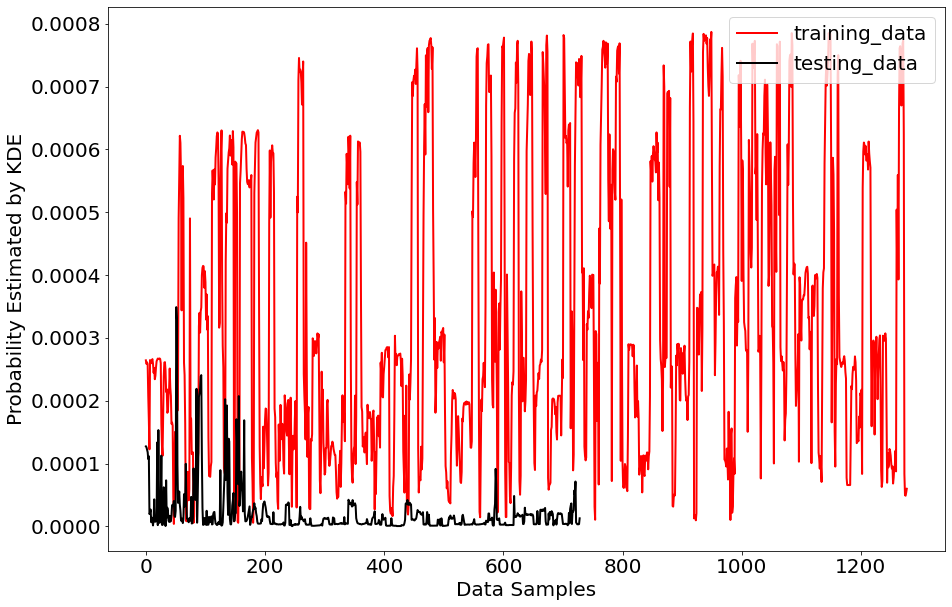

In [222]:
org_prob, new_prob, org_kde = calculate_prob_cmp(org_data = p2_2020,
                new_data = p2_2021,
                sel_cols = ['NB2_S_1_NYZ_sys_x_PcwOut_x', 'NB2_S_1_NYZ_sys_x_PcwIn_x',
                            'NB2_S_1_NYZ_cwp_9_HzSPR_x', 'NB2_S_1_NYZ_cwp_10_HzSPR_x',
                            'NB2_S_1_NYZ_cwp_11_HzSPR_x', 'NB2_S_1_NYZ_cwp_12_HzSPR_x'],
                bw = 1,
                org_data_label = 'training_data',
                new_data_label = 'testing_data',
                save_dir = '.',
                do_draw = True)



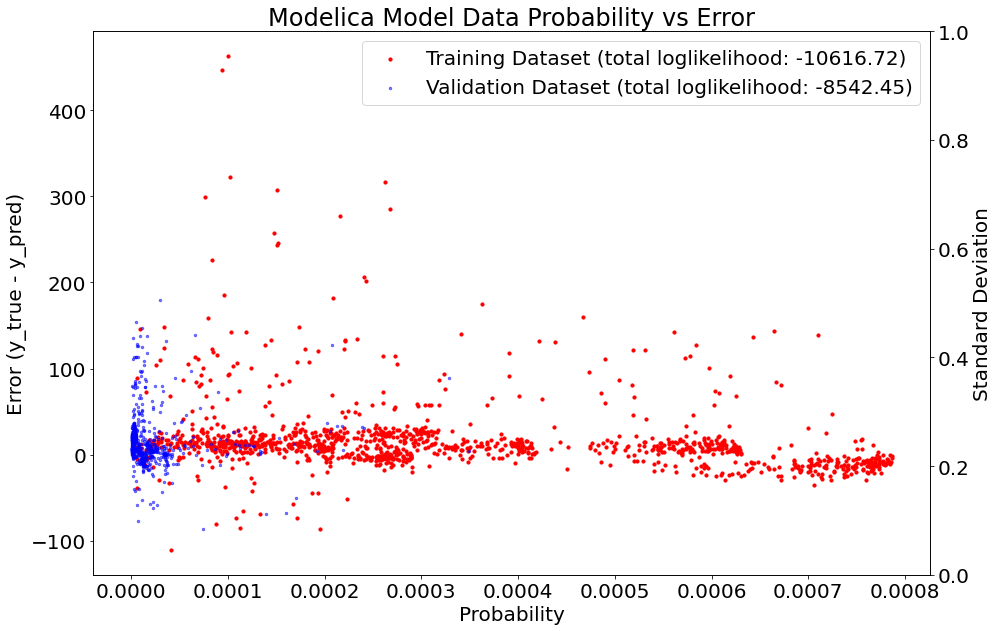

In [181]:
draw_prob_vs_err(y_true_valid = mo_test_df['Fcw_yobse'].values,
                     y_pred_valid = mo_test_df['Fcw_ypred'].values,
                     x_prob_valid = new_prob,
                     y_true_train = mo_train_df['Fcw_yobse'].values,
                     y_pred_train = mo_train_df['Fcw_ypred'].values,
                     x_prob_train = org_prob,
                     fig_title = 'Modelica Model Data Probability vs Error',
                 save_dir = '.',
                 fig_name = 'mo_err_vs_prob.png')

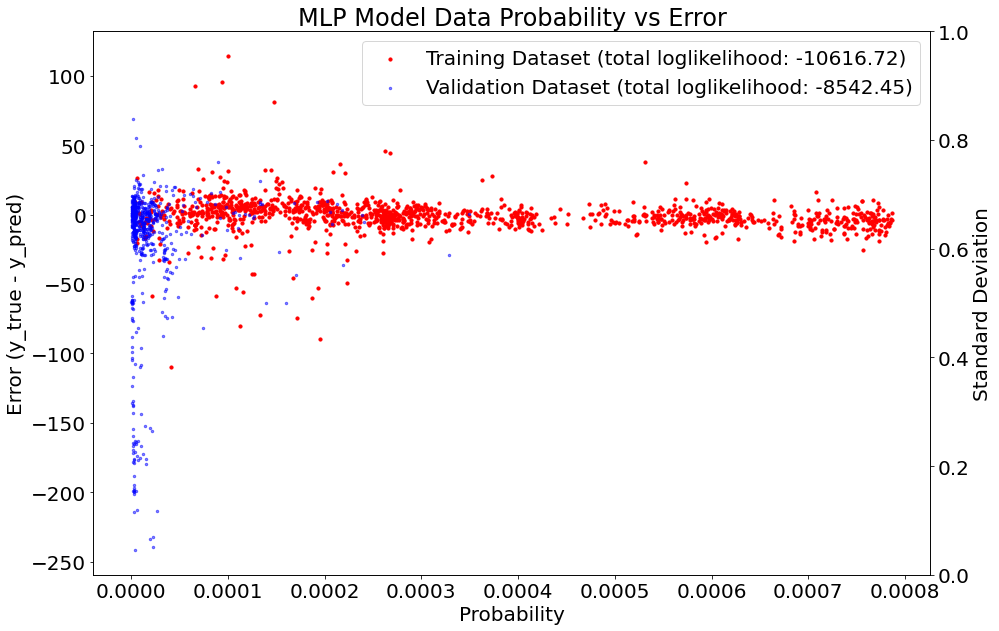

In [182]:
draw_prob_vs_err(y_true_valid = mlp_test_df['Fcw_yobse'].values,
                     y_pred_valid = mlp_test_df['Fcw_ypred'].values,
                     x_prob_valid = new_prob,
                     y_true_train = mlp_train_df['Fcw_yobse'].values,
                     y_pred_train = mlp_train_df['Fcw_ypred'].values,
                     x_prob_train = org_prob,
                     fig_title = 'MLP Model Data Probability vs Error',
                 save_dir = '.',
                 fig_name = 'mlp_err_vs_prob.png')

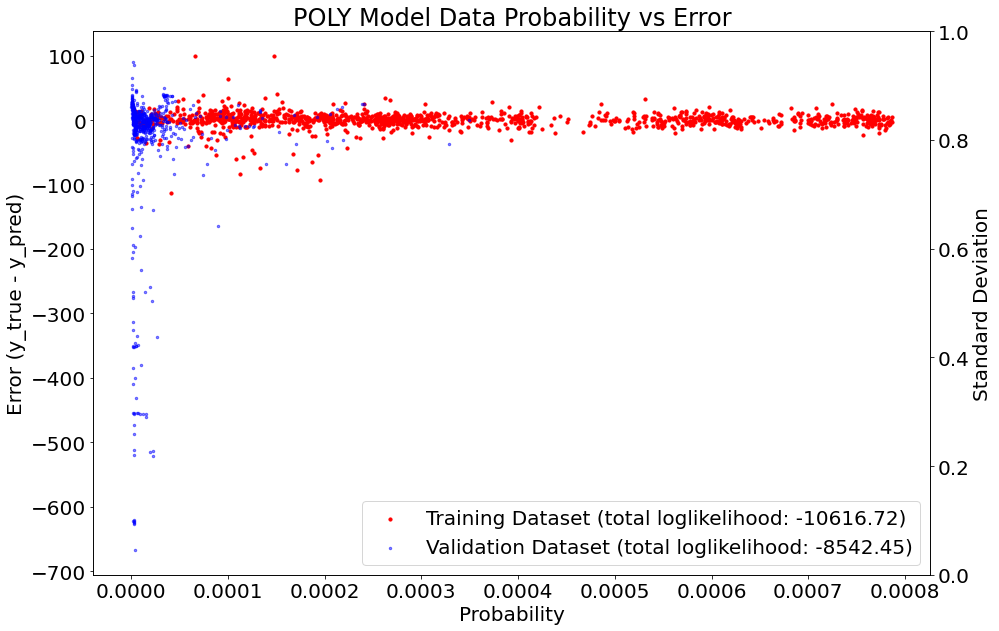

In [183]:
draw_prob_vs_err(y_true_valid = poly_test_df['Fcw_yobse'].values,
                     y_pred_valid = poly_test_df['Fcw_ypred'].values,
                     x_prob_valid = new_prob,
                     y_true_train = poly_train_df['Fcw_yobse'].values,
                     y_pred_train = poly_train_df['Fcw_ypred'].values,
                     x_prob_train = org_prob,
                     fig_title = 'POLY Model Data Probability vs Error',
                 save_dir = '.',
                 fig_name = 'poly_err_vs_prob.png')

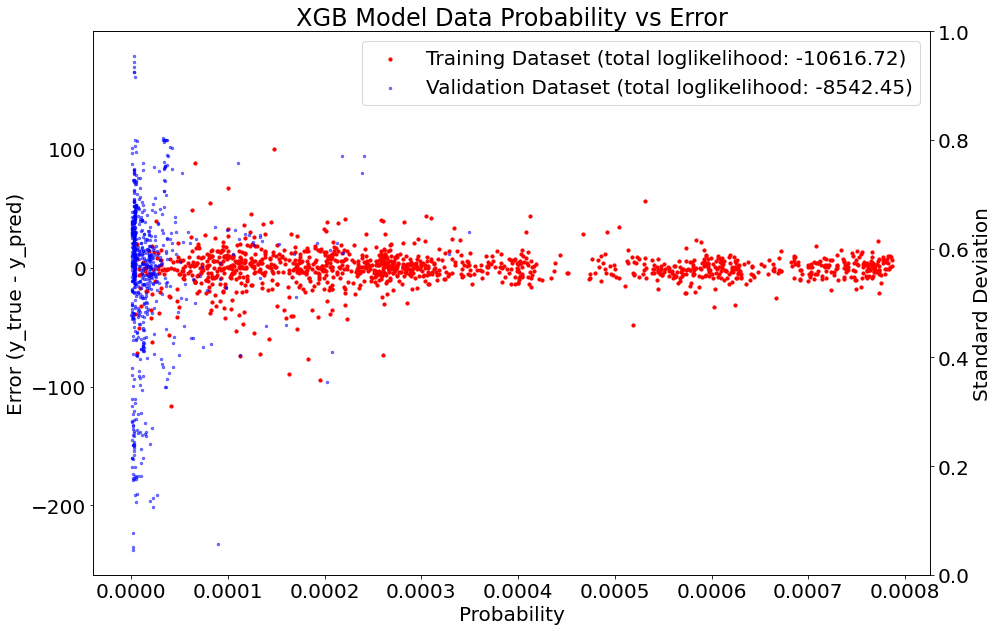

In [184]:
draw_prob_vs_err(y_true_valid = xgb_test_df['Fcw_yobse'].values,
                     y_pred_valid = xgb_test_df['Fcw_ypred'].values,
                     x_prob_valid = new_prob,
                     y_true_train = xgb_train_df['Fcw_yobse'].values,
                     y_pred_train = xgb_train_df['Fcw_ypred'].values,
                     x_prob_train = org_prob,
                     fig_title = 'XGB Model Data Probability vs Error',
                 save_dir = '.',
                 fig_name = 'xgb_err_vs_prob.png')

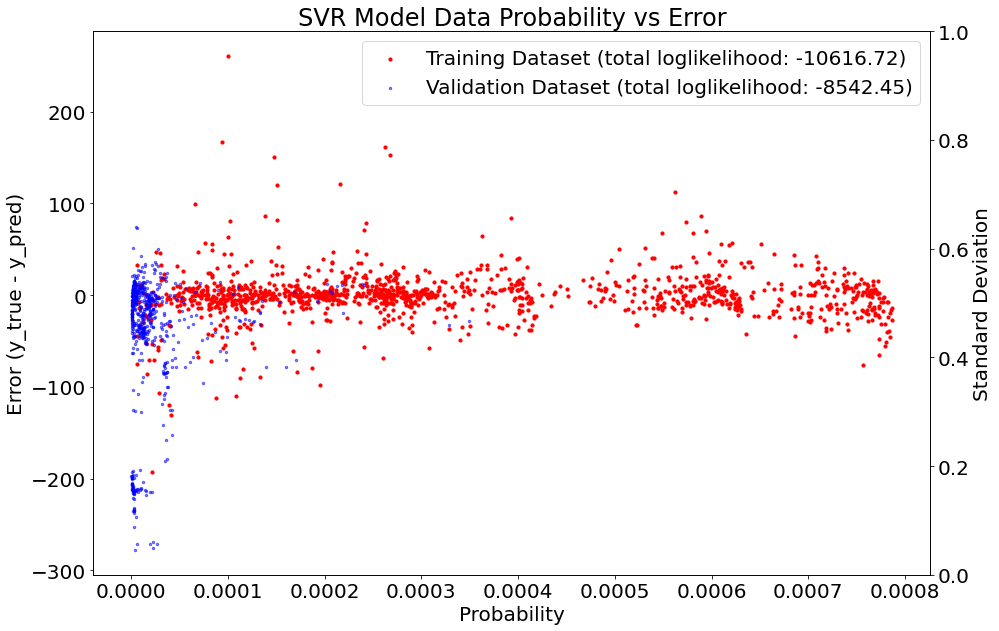

In [185]:
draw_prob_vs_err(y_true_valid = svr_test_df['Fcw_yobse'].values,
                     y_pred_valid = svr_test_df['Fcw_ypred'].values,
                     x_prob_valid = new_prob,
                     y_true_train = svr_train_df['Fcw_yobse'].values,
                     y_pred_train = svr_train_df['Fcw_ypred'].values,
                     x_prob_train = org_prob,
                     fig_title = 'SVR Model Data Probability vs Error',
                 save_dir = '.',
                 fig_name = 'svr_err_vs_prob.png')

In [223]:
mahalanobis = calculate_mahalanobis(org_data = p2_2020, 
                                new_data = p2_2021,
                                sel_cols = ['NB2_S_1_NYZ_sys_x_PcwOut_x', 'NB2_S_1_NYZ_sys_x_PcwIn_x',
                            'NB2_S_1_NYZ_cwp_9_HzSPR_x', 'NB2_S_1_NYZ_cwp_10_HzSPR_x',
                            'NB2_S_1_NYZ_cwp_11_HzSPR_x', 'NB2_S_1_NYZ_cwp_12_HzSPR_x'])

In [224]:
mahalanobis

[2.377501704406057,
 2.33135718058098,
 2.3408586264081523,
 2.3468856643596565,
 2.427501421152914,
 2.3490536821213626,
 3.7267673605739016,
 3.7772054299920867,
 3.633231847153713,
 4.335474560139302,
 3.8669546848751777,
 3.917707437368023,
 4.759659473422293,
 3.933453278792178,
 3.675632044724399,
 4.4464895890983955,
 4.479020967611177,
 4.485103701029103,
 4.451985585473488,
 3.3915199706018124,
 4.869522553738206,
 2.396335379751564,
 3.920629617711598,
 4.441155362847124,
 4.337551132512297,
 4.044000949864095,
 3.725098465514971,
 4.719650870571785,
 4.29494210738819,
 4.143943210463452,
 3.0490090043229157,
 2.8592516256098515,
 3.2905335911187876,
 5.46959931497592,
 2.554699371526625,
 3.2810934954848965,
 3.006256991095922,
 3.149286044416559,
 3.557765183871823,
 3.692541382655265,
 3.2948781421894244,
 3.6802612727540214,
 3.607945885029353,
 3.3000728890013775,
 3.0824396863377435,
 3.1024021796804906,
 3.0484728185366334,
 3.0326957099007172,
 3.270579534094786,
 3.3

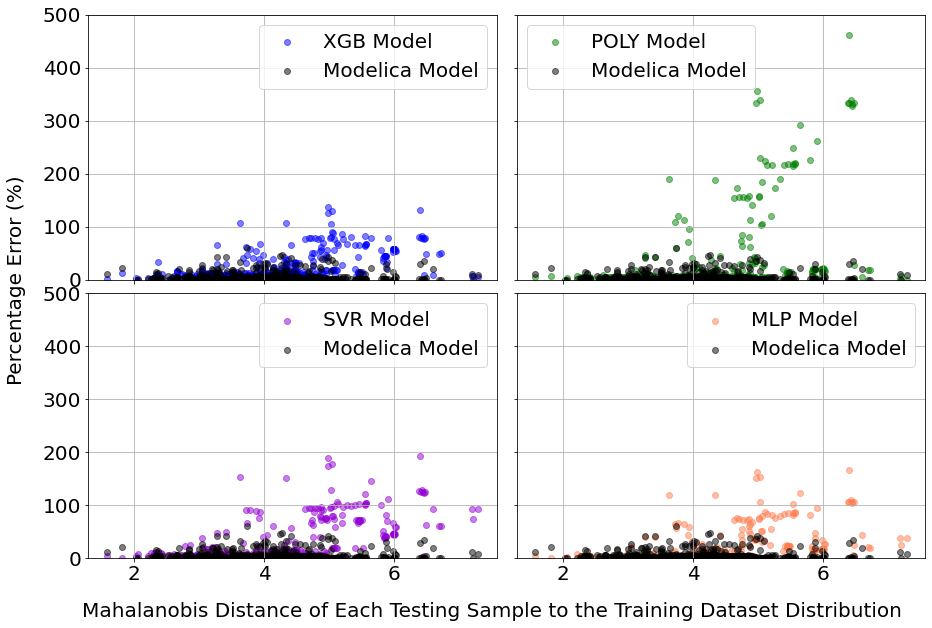

In [247]:
fig, axs = plt.subplots(2, 2, figsize = (15,10))
axs[0][0].scatter(mahalanobis,
            100*abs(xgb_test_df['Fcw_ypred'] - xgb_test_df['Fcw_yobse'])/xgb_test_df['Fcw_yobse'],
            label = 'XGB Model', alpha = 0.5, color = 'b')
axs[0][0].scatter(mahalanobis,
            100*abs(mo_test_df['Fcw_ypred'] - mo_test_df['Fcw_yobse'])/mo_test_df['Fcw_yobse'],
           label = 'Modelica Model', alpha = .5, color = 'k')
axs[0][0].set_ylim(0, 500)
axs[0][0].set_xticklabels([])
axs[0][0].legend()
axs[0][0].text(0.2, 0, 'Percentage Error (%)', 
               horizontalalignment='center', verticalalignment='center', fontsize = 20,
               rotation = 'vertical')
axs[0][0].grid()

axs[0][1].scatter(mahalanobis,
            100*abs(poly_test_df['Fcw_ypred'] - poly_test_df['Fcw_yobse'])/poly_test_df['Fcw_yobse'],
           label = 'POLY Model', alpha = 0.5, color = 'g')
axs[0][1].scatter(mahalanobis,
            100*abs(mo_test_df['Fcw_ypred'] - mo_test_df['Fcw_yobse'])/mo_test_df['Fcw_yobse'],
           label = 'Modelica Model', alpha = .5, color = 'k')
axs[0][1].set_yticklabels([])
axs[0][1].set_xticklabels([])
axs[0][1].set_ylim(0, 500)
axs[0][1].legend()
axs[0][1].grid()


axs[1][0].scatter(mahalanobis,
            100*abs(svr_test_df['Fcw_ypred'] - svr_test_df['Fcw_yobse'])/svr_test_df['Fcw_yobse'],
           label = 'SVR Model', alpha = 0.5, color = 'darkviolet')
axs[1][0].scatter(mahalanobis,
            100*abs(mo_test_df['Fcw_ypred'] - mo_test_df['Fcw_yobse'])/mo_test_df['Fcw_yobse'],
           label = 'Modelica Model', alpha = .5, color = 'k')
axs[1][0].set_ylim(0, 500)
axs[1][0].legend()
axs[1][0].grid()
axs[1][0].text(7.5, -100, 'Mahalanobis Distance of Each Testing Sample to the Training Dataset Distribution', 
               horizontalalignment='center', verticalalignment='center', fontsize = 20)

axs[1][1].scatter(mahalanobis,
            100*abs(mlp_test_df['Fcw_ypred'] - mlp_test_df['Fcw_yobse'])/mlp_test_df['Fcw_yobse'],
           label = 'MLP Model', alpha = 0.5, color = 'coral')
axs[1][1].scatter(mahalanobis,
            100*abs(mo_test_df['Fcw_ypred'] - mo_test_df['Fcw_yobse'])/mo_test_df['Fcw_yobse'],
           label = 'Modelica Model', alpha = .5, color = 'k')
axs[1][1].set_ylim(0, 500)
axs[1][1].legend()
axs[1][1].set_yticklabels([])
#axs[1][1].set_xlabel('Mahalanobis Distance of Each Testing Sample\nto the Training Dataset Distribution')
axs[1][1].grid()

plt.subplots_adjust(wspace=0.05, hspace=0.05)


In [256]:
import copy
p2_2021_with_mlp = copy.deepcopy(p2_2021)
p2_2021_with_mlp['Fcw_ypred'] = mlp_test_df['Fcw_ypred']
p2_2021_with_mlp['Fcw_yobse'] = mlp_test_df['Fcw_yobse']
p2_2021_with_mlp['perct_err'] = abs(mlp_test_df['Fcw_yobse'] - mlp_test_df['Fcw_ypred'])/mlp_test_df['Fcw_yobse']

p2_2021_with_mlp_part = p2_2021_with_mlp.loc[p2_2021_with_mlp['perct_err'] > 0.5].iloc[7:29]

In [257]:
p2_2021_with_mlp_part

,Unnamed: 0,NB2_S_1_NYZ_sys_x_PcwOut_x,NB2_S_1_NYZ_sys_x_PcwIn_x,NB2_S_1_NYZ_cwp_9_HzSPR_x,NB2_S_1_NYZ_cwp_10_HzSPR_x,NB2_S_1_NYZ_cwp_11_HzSPR_x,NB2_S_1_NYZ_cwp_12_HzSPR_x,NB2_S_x_NYZ_x_x_Fcw_x,cwp_9_val_pos,cwp_10_val_pos,cwp_11_val_pos,cwp_12_val_pos,ts,Unnamed: 13,Fcw_ypred,err,Fcw_yobse,perct_err
108,230,546730.6667,438816.3333,0.0,25.000000,0.000000,0.0,210.129690,0.001,1.0,0.001,0.001,1625898570,NaN,385.662883,0.129690,206.713181,0.865691
109,231,555454.0000,447989.3333,0.0,25.000000,0.000000,0.0,208.845345,0.001,1.0,0.001,0.001,1625902170,NaN,385.651188,1.154655,208.949586,0.845666
110,232,509953.8333,401982.1667,0.0,25.050000,0.000000,0.0,206.013189,0.001,1.0,0.001,0.001,1625905770,NaN,385.632909,3.986811,190.764412,1.021514
111,233,368344.1667,252719.5000,0.0,26.000000,0.000000,0.0,215.404654,0.001,1.0,0.001,0.001,1625909370,NaN,385.603012,3.595346,209.820933,0.837772
112,234,369083.1667,256799.5000,0.0,25.566667,0.000000,0.0,174.802649,0.001,1.0,0.001,0.001,1625912970,NaN,385.597455,40.197351,211.542515,0.822789
113,236,493547.3333,385546.5000,0.0,25.000000,0.000000,0.0,151.802864,0.001,1.0,0.001,0.001,1625920170,NaN,385.596235,57.197136,210.129690,0.835039
114,237,472236.5000,364120.1667,0.0,25.000000,0.000000,0.0,146.574839,0.001,1.0,0.001,0.001,1625923770,NaN,385.644604,62.425161,208.845345,0.846556
115,238,457682.5000,349696.6667,0.0,25.000000,0.000000,0.0,153.841251,0.001,1.0,0.001,0.001,1625927370,NaN,385.834780,55.158749,206.013189,0.872864
116,239,532117.8333,425709.5000,0.0,24.173611,0.000000,0.0,209.709762,0.001,1.0,0.001,0.001,1625930970,NaN,391.384878,12.709762,215.404654,0.816975
117,248,365610.3333,267347.0000,0.0,25.032535,0.000000,0.0,216.130318,0.001,1.0,0.001,0.001,1625963370,NaN,388.550240,2.869681,174.802649,1.222794
